In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [3]:
import numpy
import scipy
import sklearn
import imblearn

print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)


NumPy version: 1.26.4
SciPy version: 1.13.1
scikit-learn version: 1.5.1
imblearn version: 0.12.3


In [27]:
df=pd.read_csv('Combined Data.csv/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first few rows to verify
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [8]:
len(df)

53043

In [9]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53043
Number of columns: 2


In [10]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [11]:
print(df.isnull().sum())

statement    362
status         0
dtype: int64


In [12]:
df = df.dropna()
print(df.isnull().sum())

statement    0
status       0
dtype: int64


In [13]:
# Calculate the length of each statement
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


In [14]:
df['status'].nunique()

7

In [15]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [16]:
# characters length
df['statment_length']=df['statement'].apply(lambda x:len(x))
# words length
df['num_of_words']=df['statement'].apply(lambda x:len(x.split()))
print("maximum number of characters per statment:", df['statment_length'].max())
print("maximum number of words per statment:", df['num_of_words'].max())


maximum number of characters per statment: 32759
maximum number of words per statment: 6300


In [17]:
# Check the distribution of the 'status' column with their value counts
sentiment_distribution = df['status'].value_counts()

# Display the distribution
print(sentiment_distribution)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

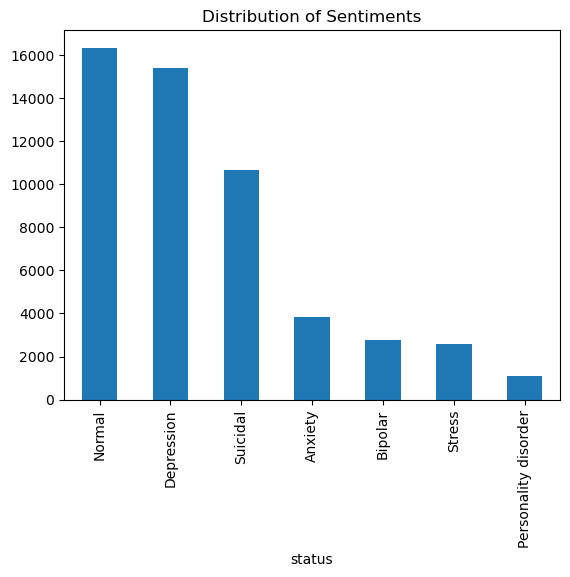

In [18]:
# plotting graph for visualizations
sentiment_distribution.plot(kind='bar', title='Distribution of Sentiments')

<Axes: >

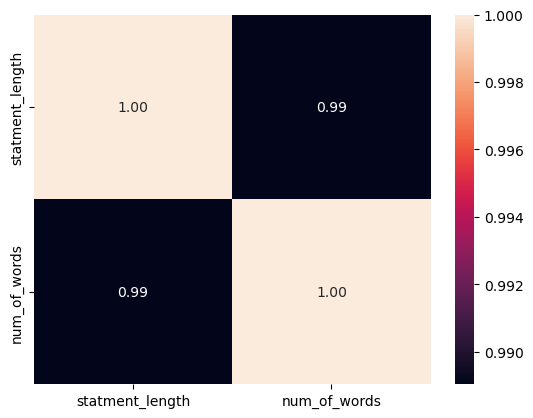

In [19]:
import seaborn as sns
corr=df[['statment_length','num_of_words']].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [20]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK resources
download('stopwords')
download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove repetitive words (keep only unique words)
    tokens = list(set(tokens))
    
    # Reconstruct the text from tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Apply preprocessing to the 'statement' column
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df[['cleaned_statement', 'status']])

                                       cleaned_statement   status
0                                                oh gosh  Anxiety
1      restless heart confused mind tune sleeping tro...  Anxiety
2      restless stay back doubt place dear forward wrong  Anxiety
3      worried ive shifted focus else im something still  Anxiety
4                             restless month im boy mean  Anxiety
...                                                  ...      ...
53038  like pretty dealt mins stable used anything br...  Anxiety
53039  like worse pretty lust find funny suffered rea...  Anxiety
53040       way nights cant meds didnt help sleep better  Anxiety
53041  tips worked certain give makes anything long s...  Anxiety
53042  like instead pulling debilitating key anxiety ...  Anxiety

[52681 rows x 2 columns]


In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))




Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: Counter({'Anxiety': 16343, 'Normal': 16343, 'Depression': 16343, 'Suicidal': 16343, 'Stress': 16343, 'Bipolar': 16343, 'Personality disorder': 16343})


In [23]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (91520, 78550)
X_test shape: (22881, 78550)
y_train shape: (91520,)
y_test shape: (22881,)


# CNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)

Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))  # Reduced embedding dimension
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))  # Reduced filters and kernel size
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # Reduced dropout
model.add(Flatten())
model.add(Dense(16, activation='relu'))  # Reduced Dense layer size
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=2)  # Reduced epochs and batch size

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           64000     
                                                                 
 conv1d (Conv1D)             (None, 99, 64)            4160      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 64)            0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                        

# RNN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)

Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [25]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))  # Reduced embedding dimension
model.add(SimpleRNN(64, return_sequences=False))  # Simple RNN layer
model.add(Dropout(0.3))  # Reduced dropout
model.add(Dense(16, activation='relu'))  # Reduced Dense layer size
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=2)  # Reduced epochs and batch size

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 7)                 119       
                                                                 
Total params: 71,367
Trainable params: 71,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2860/2860 - 445s - loss: 1.4735 - accuracy